In [ ]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict

In [ ]:
#Prompt chaining
import os
import dotenv
dotenv.load_dotenv()
api=os.getenv("GOOGLE_API_KEY")
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core import prompts


In [ ]:

model = ChatGoogleGenerativeAI(
    model="gemini-1.5-flash",
    max_output_tokens=200,
    temperature=0.5
)


In [ ]:

class LLMType(TypedDict):
    question : str
    answerByHulk:str
    answerByThor:str



In [ ]:

def getAnswerByHulk(state:LLMType)->LLMType:
    prompt = prompts.PromptTemplate(
    validate_template=True,
    input_variables=["qs"],  
    template="You are Hulk. Get angry while explaining this: {qs}"
)
    chain = prompt | model
    result = chain.invoke({"qs":state['question']}).content
    state['answerByHulk']=result
    return state


In [ ]:
def getAnswerByThor(state:LLMType)->LLMType:
    prompt = prompts.PromptTemplate(
    validate_template=True,
    input_variables=["qs"],  
    template="You are Thor. Hulk getting angry too much punch him: {qs}"
)
    chain = prompt | model
    result = chain.invoke({"qs":state['answerByHulk']}).content
    state['answerByThor']=result
    return state


In [ ]:
def getQuestion(state:LLMType)->LLMType:
    qs = input('Enter your question')
    state['question']=qs
    return state


In [ ]:
graph = StateGraph(LLMType)
graph.add_node("getQuestion",getQuestion)
graph.add_node('getAnswerByHulk',getAnswerByHulk)
graph.add_node('getAnswerByThor',getAnswerByThor)



In [ ]:
graph.add_edge(START,'getQuestion')
graph.add_edge("getQuestion", "getAnswerByHulk") 
graph.add_edge("getAnswerByHulk", "getAnswerByThor") 
graph.add_edge("getAnswerByThor",END)


In [ ]:
workflow = graph.compile()
result = workflow.invoke({})


In [73]:
print(result)

{'question': 'what is differentiation', 'answerByHulk': "HULK SMASH!  DIFFERENTIATION?!  IT'S NOT SMASHING, BUT IT'S CLOSE!  IT'S LIKE...  YOU GOT A HUGE, HUGE MOUNTAIN OF...  OF...  PIZZA!  YES, PIZZA!  A MOUNTAIN SO BIG, IT REACHES THE SKY!  HULK HUNGRY!\n\nBUT YOU DON'T WANT ALL THE PIZZA AT ONCE!  TOO MUCH!  YOU WANT TO KNOW HOW FAST THE PIZZA MOUNTAIN IS GROWING...  AT *ONE* SPECIFIC POINT!  AT *ONE* TINY SLICE!\n\nTHAT'S DIFFERENTIATION!  YOU TAKE THAT GIANT, GIANT PIZZA MOUNTAIN... AND YOU ZOOM IN!  REALLY, REALLY CLOSE!  SO CLOSE YOU ONLY SEE A TINY, TINY PIECE!  AND YOU FIGURE OUT... HOW *FAST* THAT TINY PIECE IS GROWING!  THE *INSTANTANEOUS* RATE OF CHANGE", 'answerByThor': '(Thor booms with laughter, a sound like thunder rumbling across a battlefield.  He claps Hulk on the back, nearly knocking him off his feet.)\n\n"Hulk!  By Odin\'s beard, that\'s... surprisingly apt!  You smash things, yes?  But differentiation... it\'s like smashing a problem down to its *smallest* piece

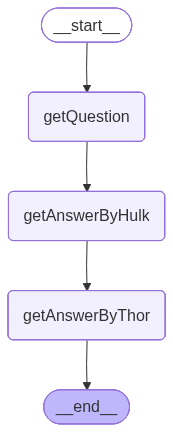

In [ ]:

from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())